Testing the factor 'positive'
Inital capital - $1,000,000,000
Divide the capital into 10 portfolio
10 long positons
If the stock released its ESG report and its 'positive' factor is >40, long the stock
Each long position will be held till the last trading day of that year

In [1]:
import pandas as pd
import numpy as np
import datetime
import time
import yfinance as yf
from portfolio import Portfolio

In [2]:
# Import ESG Score Data
ESG_score_2017  = pd.read_csv("../ESG_score/ESG_data_2017.csv")
ESG_score_2018  = pd.read_csv("../ESG_score/ESG_data_2018.csv")
ESG_score_2019  = pd.read_csv("../ESG_score/ESG_data_2019.csv")
ESG_score_2020  = pd.read_csv("../ESG_score/ESG_data_2020.csv")
ESG_score_2021  = pd.read_csv("../ESG_score/ESG_data_2021.csv")
ESG_score_2022  = pd.read_csv("../ESG_score/ESG_data_2022.csv")
#ESG_data_2017.sort_values(by=['positive'], ascending=False).head(20)

In [3]:
ESG_report = pd.read_csv("../ESG_report/concatenatedESGData.csv")
ESG_report = ESG_report.drop(['Unnamed: 0'], axis=1)
# ESG_report_2017.loc[ESG_report['stock_code'] == '02196.HK']
#ESG_report_2017.sort_values(by=['ESG_2017_rel_date'], ascending=False)

In [4]:
ESG_report['ESG_2017_rel_date'] = pd.to_datetime(ESG_report['ESG_2017_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2018_rel_date'] = pd.to_datetime(ESG_report['ESG_2018_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2019_rel_date'] = pd.to_datetime(ESG_report['ESG_2019_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2020_rel_date'] = pd.to_datetime(ESG_report['ESG_2020_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2021_rel_date'] = pd.to_datetime(ESG_report['ESG_2021_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2022_rel_date'] = pd.to_datetime(ESG_report['ESG_2022_rel_date'], format='%d/%m/%Y')
ESG_report['ESG_2023_rel_date'] = pd.to_datetime(ESG_report['ESG_2023_rel_date'], format='%d/%m/%Y')
ESG_report = ESG_report.drop(563)
# ESG_report.sort_values(by=['ESG_2017_rel_date'], ascending=False).head(50)

In [5]:
portfolio = Portfolio(1000000, 10, 30, ESG_report, ESG_score_2017, ESG_score_2018, ESG_score_2019, ESG_score_2020, ESG_score_2021, ESG_score_2022)

In [6]:
portfolio.get_balance()

1000000

In [7]:
portfolio.strategy()

0756.HK score of 3 is not greater than 30
2033.HK score of 4 is not greater than 30
8293.HK score of 3 is not greater than 30
0330.HK score of 18 is not greater than 30
0513.HK score of 3 is not greater than 30
8383.HK score of 3 is not greater than 30
6068.HK score of 5 is not greater than 30
0005.HK score of 26 is not greater than 30
2343.HK score of 17 is not greater than 30
0763.HK score of 35 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-03-15 29.049999237060547
[*********************100%%**********************]  1 of 1 completed
0874.HK score of 18 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
1317.HK score of 25 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-17 -> 2018-03-18)')



17-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-18 -> 2018-03-19)')



18-03-2018 is holiday
0388.HK score of 12 is not greater than 30
2386.HK score of 29 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
1336.HK score of 14 is not greater than 30
2318.HK score of 27 is not greater than 30
0338.HK score of 38 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-03-20 4.869999885559082
[*********************100%%**********************]  1 of 1 completed
2799.HK score of 22 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1299.HK score of 20 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2600.HK score of 27 is not greater than 30
0857.HK score of 50 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-03-22 5.5300


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-24 -> 2018-03-25)')



24-03-2018 is holiday
1171.HK score of 36 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-03-26 6.5
[*********************100%%**********************]  1 of 1 completed
0386.HK score of 21 is not greater than 30
1088.HK score of 19 is not greater than 30
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-25 -> 2018-03-26)')



25-03-2018 is holiday
1055.HK score of 0 is not greater than 30
6178.HK score of 15 is not greater than 30
1071.HK score of 24 is not greater than 30
1288.HK score of 50 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-03-26 4.400000095367432
[*********************100%%**********************]  1 of 1 completed
0998.HK score of 9 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1398.HK score of 0 is not greater than 30
6837.HK


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-30 -> 2018-03-31)')



30-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-03-31 -> 2018-04-01)')



31-03-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-01 -> 2018-04-02)')



01-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-02 -> 2018-04-03)')



02-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1972.HK score of 45 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-04-04 27.399999618530273
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[**********


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-05 -> 2018-04-06)')



05-04-2018 is holiday
2638.HK score of 0 is not greater than 30
0887.HK score of 7 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-07 -> 2018-04-08)')



07-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-08 -> 2018-04-09)')



08-04-2018 is holiday
2382.HK score of 21 is not greater than 30
2038.HK score of 5 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 compl


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-14 -> 2018-04-15)')



14-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0763.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-15 -> 2018-04-16)')



15-04-2018 is holiday
0902.HK score of 39 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-04-16 4.889999866485596
[*********************100%%**********************]  1 of 1 completed
0103.HK score of 11 is not greater than 30
6116.HK score of 10 is not greater than 30
0752.HK score of 7 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2196.HK score of 62 is


1 Failed download:
['0857.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-21 -> 2018-04-22)')



21-04-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0857.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-22 -> 2018-04-23)')



22-04-2018 is holiday
2001.HK score of 7 is not greater than 30
8282.HK score of 4 is not greater than 30
0670.HK score of 32 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-04-23 5.489999771118164
[*********************100%%**********************]  1 of 1 completed
0528.HK score of 15 is not greater than 30
1831.HK score of 4 is not greater than 30
0003.HK score of 36 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-04-23 12.158692359924316
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]


1 Failed download:
['2039.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-28 -> 2018-04-29)')



28-04-2018 is holiday
6088.HK score of 22 is not greater than 30
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2039.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-04-29 -> 2018-04-30)')



29-04-2018 is holiday
1281.HK score of 13 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-01 -> 2018-05-02)')



01-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1616.HK score of 7 is not greater than 30
1578.HK score of 29 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0809.HK score of 6 is not greater than 30
3889.HK score of 7 is 


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-05 -> 2018-05-06)')



05-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-06 -> 2018-05-07)')



06-05-2018 is holiday
1202.HK score of 13 is not greater than 30
1910.HK score of 8 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2016.HK score of 9 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2018.HK score of 15 is


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-12 -> 2018-05-13)')



12-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2196.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-13 -> 2018-05-14)')



13-05-2018 is holiday
3369.HK score of 17 is not greater than 30
1008.HK score of 4 is not greater than 30
8329.HK score of 9 is not greater than 30
2007.HK score of 29 is not greater than 30
1480.HK score of 4 is not greater than 30
1093.HK score of 18 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0778.HK score of 3 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-19 -> 2018-05-20)')



19-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-20 -> 2018-05-21)')



20-05-2018 is holiday
0123.HK score of 0 is not greater than 30
0066.HK score of 42 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-05-21 45.5
[*********************100%%**********************]  1 of 1 completed
2020.HK score of 16 is not greater than 30
1359.HK score of 20 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0670.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-22 -> 2018-05-23)')



22-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1210.HK score of 5 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1913.HK score of 23 is not greater tha


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-26 -> 2018-05-27)')



26-05-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3698.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-05-27 -> 2018-05-28)')



27-05-2018 is holiday
1072.HK score of 9 is not greater than 30
8225.HK score of 1 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0829.HK score of 3 is not greater than 30
1631.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0297.HK score of 8 is not greater than 30
0688.HK score of 0 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1330.HK score of 8 is not greater than 30
1262.HK score of 8 is not greater than 30
0643.HK score of 2 is not greater than 30
0522.HK score of 12 is not greater than 30
1127.HK score of 5 is not greater than 30
2688.HK score of 20 is not greater than 30
8226.HK score of 3 is not greater than 30
1257.HK score o


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-02 -> 2018-06-03)')



02-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-03 -> 2018-06-04)')



03-06-2018 is holiday
0236.HK score of 5 is not greater than 30
8495.HK score of 4 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0265.HK score of 6 is not greater than 30
1070.HK score of 17 is not greater than 30
0598.HK score of 8 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
6808.HK score of 7 is not greater than 30
0303.HK score of 25 is not greater than 30
1090.HK score of 6 is not greater than 30
0177.HK score of 22 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
3311.HK score of 14 is not greater than 30
8


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-09 -> 2018-06-10)')



09-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['3618.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-10 -> 2018-06-11)')



10-06-2018 is holiday
3377.HK score of 20 is not greater than 30
1656.HK score of 5 is not greater than 30
1513.HK score of 19 is not greater than 30
0905.HK score of 4 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
2226.HK score of 20 is not greater than 30
0257.HK score of 24 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
0719.HK score of 18 is not greater than 30
0185.HK score of 4 is not greater than 30
2607.HK score of 33 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-06-13 22.799999237060547
[*********************100%%**********************]  1 of 1 completed
1966.HK score of 5 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0046.HK score of 6 is not greater than 30
8333.HK score of 2 is not greater than 30
1929.HK score of 12 is not 


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-16 -> 2018-06-17)')



16-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-17 -> 2018-06-18)')



17-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0066.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-18 -> 2018-06-19)')



18-06-2018 is holiday
0690.HK score of 4 is not greater than 30
1266.HK score of 5 is not greater than 30
2878.HK score of 4 is not greater than 30
1268.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0101.HK score of 20 is not greater than 30
8066.HK score of 5 is not greater than 30
0135.HK score of 12 is not greater than 30
8027.HK score of 4 is not greater than 30
8292.HK score of 5 is not greater than 30
8076.HK score of 12 is not greater than 30
0010.HK score of 20 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
2348.HK score of 7 is not greater than 30
0819.HK score of 9 is not greater than 30
6896.HK score of 2 is not greater than 30
1679.HK score of 10 is not greater than 30
8416.HK score of 3 is not greater than 30
[*********************10


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-23 -> 2018-06-24)')



23-06-2018 is holiday
2738.HK score of 4 is not greater than 30
3848.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-24 -> 2018-06-25)')



24-06-2018 is holiday
1508.HK score of 18 is not greater than 30
1030.HK score of 13 is not greater than 30
8211.HK score of 4 is not greater than 30
0817.HK score of 24 is not greater than 30
8179.HK score of 3 is not greater than 30
8139.HK score of 4 is not greater than 30
0743.HK score of 30 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-06-25 4.989999771118164
[*********************100%%**********************]  1 of 1 completed
0326.HK score of 8 is not greater than 30
1205.HK score of 11 is not greater than 30
1302.HK score of 5 is not greater than 30
8493.HK score of 3 is not greater than 30
8437.HK score of 2 is not greater than 30
0524.HK score of 3 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
8053.HK score of 5 is not greater than 30
1176.HK score of 5 is not greater than 30
2202.HK score of 35 is greater than 30
[*


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-06-30 -> 2018-07-01)')



30-06-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-01 -> 2018-07-02)')



01-07-2018 is holiday
0268.HK score of 24 is not greater than 30
8325.HK score of 39 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-07-03 0.8999999761581421
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-02 -> 2018-07-03)')



02-07-2018 is holiday
1188.HK score of 4 is not greater than 30
0293.HK score of 26 is not greater than 30
0094.HK score of 4 is not greater than 30
1316.HK score of 9 is not greater than 30
2233.HK score of 0 is not greater than 30
6158.HK score of 6 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1527.HK score of 5 is not greater than 30
1231.HK score of 6 is not greater than 30
3828.HK score of 4 


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-07 -> 2018-07-08)')



07-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-08 -> 2018-07-09)')



08-07-2018 is holiday
2698.HK score of 15 is not greater than 30
0371.HK score of 20 is not greater than 30
1068.HK score of 8 is not greater than 30
0609.HK score of 6 is not greater than 30
1184.HK score of 2 is not greater than 30
0438.HK score of 5 is not greater than 30
0405.HK score of 17 is not greater than 30
0163.HK score of 7 is not greater than 30
0296.HK score of 5 is not greater than 30
0363.HK score of 6 is not greater than 30
0137.HK score of 2 is not greater than 30
1588.HK score of 0 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-14 -> 2018-07-15)')



14-07-2018 is holiday
0837.HK score of 5 is not greater than 30
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['2607.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-15 -> 2018-07-16)')



15-07-2018 is holiday
2727.HK score of 31 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-07-16 2.640000104904175
[*********************100%%**********************]  1 of 1 completed
1569.HK score of 4 is not greater than 30
6838.HK score of 4 is not greater than 30
0842.HK score of 6 is not greater than 30
3322.HK score of 6 is not greater than 30
0813.HK score of 14 is not greater than 30
1811.HK score of 15 is not greater than 30
1076.HK score of 7 is not greater than 30
3738.HK score of 3 is not greater than 30
1711.HK score of 6 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%*******************


1 Failed download:
['0743.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-21 -> 2018-07-22)')



21-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0743.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-22 -> 2018-07-23)')



22-07-2018 is holiday
0925.HK score of 13 is not greater than 30
2266.HK score of 4 is not greater than 30
1177.HK score of 9 is not greater than 30
0251.HK score of 3 is not greater than 30
0258.HK score of 2 is not greater than 30
0425.HK score of 19 is not greater than 30
3969.HK score of 19 is not greater than 30
1051.HK score of 2 is not greater than 30
1708.HK score of 0 is not greater than 30
2120.HK score of 8 is not greater than 30
1483.HK score of 1 is not greater than 30
2329.HK score of 4 is not greater than 30
1727.HK score of 20 is not greater than 30
1690.HK score of 1 is not greater than 30
6036.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 complete


1 Failed download:
['0762.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-28 -> 2018-07-29)')



28-07-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0762.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-07-29 -> 2018-07-30)')



29-07-2018 is holiday
0381.HK score of 3 is not greater than 30
1858.HK score of 2 is not greater than 30
3933.HK score of 26 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1733.HK score of 7 is not greater than 30
1225.HK score of 3 is not greater than 30
0573.HK score of 2 is not greater than 30
0969.HK score of 5 is not greater than 30
0557.HK score of 7 is not greater than 30
2078.HK score of 4 is not greater than 30
0355.HK score of 10 is not greater than 30
0617.HK score of 10 is not greater than 30
0078.HK score of 10 is not greater than 30
0120.HK score of 6 is not greater than 30
0828.HK score of 5 is not greater than 30
1218.HK score of 3 is not greater than 30
1094.HK score of 2 is not greater than 30
0807.HK score of 6 is not


1 Failed download:
['0836.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-04 -> 2018-08-05)')



04-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0836.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-05 -> 2018-08-06)')



05-08-2018 is holiday
0058.HK score of 6 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
8057.HK score of 4 is not greater than 30
0910.HK score of 2 is not greater than 30
2663.HK score of 1 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-11 -> 2018-08-12)')



11-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-12 -> 2018-08-13)')



12-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
1466.HK score of 4 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-18 -> 2018-08-19)')



18-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0966.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-19 -> 2018-08-20)')



19-08-2018 is holiday
0179.HK score of 21 is not greater than 30
8391.HK score of 4 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
8326.HK score of 7 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0223.HK score of 4 is not greater than 30
1213.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0486.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-25 -> 2018-08-26)')



25-08-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0486.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-08-26 -> 2018-08-27)')



26-08-2018 is holiday
1245.HK score of 4 is not greater than 30
8428.HK score of 3 is not greater than 30
0918.HK score of 6 is not greater than 30
8193.HK score of 4 is not greater than 30
8269.HK score of 5 is not greater than 30
0992.HK score of 37 is greater than 30
[*********************100%%**********************]  1 of 1 completed
2018-08-31 5.119999885559082
[*********************100%%**********************]  1 of 1 completed
8080.HK score of 2 is not greater than 30
0125.HK score of 2 is not greater than 30
0262.HK score of 2 is not greater than 30
8268.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-01 -> 2018-09-02)')



01-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-02 -> 2018-09-03)')



02-09-2018 is holiday
0384.HK score of 18 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
0151.HK score of 16 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
8507.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-08 -> 2018-09-09)')



08-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-09 -> 2018-09-10)')



09-09-2018 is holiday
0738.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
8315.HK score of 5 is not greater than 30
1116.HK score of 4 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed
0674.HK score of 4 is not greater than 30
8356.HK score of 4 is not greater than 30
8511.HK score of 3 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-15 -> 2018-09-16)')



15-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-16 -> 2018-09-17)')



16-09-2018 is holiday
1633.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
8072.HK score of 10 is not greater than 30
8200.HK score of 6 is not greater than 30
0401.HK score of 4 is not greater than 30
1271.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
0932.HK score of 4 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
0745.HK score of 2 is not greater than 30
8316.HK score of 6 is not greater than 30
1686.HK score of 3 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
8319.HK score of 8 is not greater than 30
0130.HK score of 4 is not greater than 30
8295.HK score of 1 is not greater than 30
0336.HK score of 10 is not greater than 30
8501.HK score of 3 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%***************


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-22 -> 2018-09-23)')



22-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-23 -> 2018-09-24)')



23-09-2018 is holiday
1496.HK score of 3 is not greater than 30
8545.HK score of 4 is not greater than 30
8423.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-25 -> 2018-09-26)')



25-09-2018 is holiday
2138.HK score of 5 is not greater than 30
0899.HK score of 7 is not greater than 30
8143.HK score of 3 is not greater than 30
8047.HK score of 1 is not greater than 30
8367.HK score of 2 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
3998.HK score of 14 is not greater than 30
[*********************100%%**********************]  1 of 1 completed
1660.HK score of 4 is not greater than 30
0276.HK score of 6 is not greater than 30
8300.HK score of 6 is not greater than 30
1830.HK score of 6 is not greater than 30
8320.HK score of 7 is not greater than 30
0030.HK score of 4 is not greater than 30
8220.HK score of 4 is not greater than 30
8277.HK score of 4 is not greater than 30
0681.HK score of 4 is not greater than 30
8195.HK score of 2 is not greater than 30
8132.HK score of 4 is not greater than 30
8149.HK score of 4 is not greater than 30
8448.HK score of 3 is not greater than 30
8510.HK score of 3 is not greater than 3


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-29 -> 2018-09-30)')



29-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-09-30 -> 2018-10-01)')



30-09-2018 is holiday
[*********************100%%**********************]  1 of 1 completed


1 Failed download:
['0992.HK']: Exception('%ticker%: No price data found, symbol may be delisted (1d 2018-10-01 -> 2018-10-02)')



01-10-2018 is holiday
0896.HK score of 8 is not greater than 30
0403.HK score of 3 is not greater than 30
1716.HK score of 6 is not greater than 30
0959.HK score of 4 is not greater than 30
1559.HK score of 3 is not greater than 30
0343.HK score of 2 is not greater than 30
1621.HK score of 2 is not greater than 30
0280.HK score of 3 is not greater than 30
0321.HK score of 7 is not greater than 30
0794.HK score of 5 is not greater than 30
0052.HK score of 8 is not greater than 30
2368.HK score of 5 is not greater than 30
0417.HK score of 4 is not greater than 30
2326.HK score of 4 is not greater than 30
1709.HK score of 5 is not greater than 30
0252.HK score of 2 is not greater than 30
0684.HK score of 7 is not greater than 30
0491.HK score of 4 is not greater than 30
1229.HK score of 5 is not greater than 30
1662.HK score of 5 is not greater than 30
1001.HK score of 6 is not greater than 30
2113.HK score of 5 is not greater than 30
0973.HK score of 11 is not greater than 30
0057.HK sc

In [8]:
daily_pls = portfolio.get_daily_pls()
for daily_pl in daily_pls:
    print("date: " + daily_pl["date"].strftime("%d-%m-%Y") + ", pl: " + str(daily_pl["pl"]) + ", balance: " + str(daily_pl["balance"]))

date: 01-01-2018, pl: 0, balance: 1000000
date: 02-01-2018, pl: 0, balance: 1000000
date: 03-01-2018, pl: 0, balance: 1000000
date: 04-01-2018, pl: 0, balance: 1000000
date: 05-01-2018, pl: 0, balance: 1000000
date: 06-01-2018, pl: 0, balance: 1000000
date: 07-01-2018, pl: 0, balance: 1000000
date: 08-01-2018, pl: 0, balance: 1000000
date: 09-01-2018, pl: 0, balance: 1000000
date: 10-01-2018, pl: 0, balance: 1000000
date: 11-01-2018, pl: 0, balance: 1000000
date: 12-01-2018, pl: 0, balance: 1000000
date: 13-01-2018, pl: 0, balance: 1000000
date: 14-01-2018, pl: 0, balance: 1000000
date: 15-01-2018, pl: 0, balance: 1000000
date: 16-01-2018, pl: 0, balance: 1000000
date: 17-01-2018, pl: 0, balance: 1000000
date: 18-01-2018, pl: 0, balance: 1000000
date: 19-01-2018, pl: 0, balance: 1000000
date: 20-01-2018, pl: 0, balance: 1000000
date: 21-01-2018, pl: 0, balance: 1000000
date: 22-01-2018, pl: 0, balance: 1000000
date: 23-01-2018, pl: 0, balance: 1000000
date: 24-01-2018, pl: 0, balance: 

In [9]:
process_daily_pls = []
for index in range(len(daily_pls)):
    if index != 0:
        process_row = {'date': daily_pls[index]["date"].strftime("%Y-%m-%d"), 'pl': (daily_pls[index]['pl'] / 1000000) * 100}
    else:
        process_row = {'date': daily_pls[index]["date"].strftime("%Y-%m-%d"), 'pl': 0}
    process_daily_pls.append(process_row)

In [10]:
def get_stock_price():
    start = datetime.datetime(2018, 1, 1).date()
    end = datetime.datetime(2018, 12, 31).date()
    # end = start + datetime.timedelta(days=35)
    # print(end)
    stock_data = yf.download("^HSI", start, end)
    # print(stock_data)
    return stock_data

HSI_price = get_stock_price()

[*********************100%%**********************]  1 of 1 completed


In [11]:
HSI_returns = []
for index, row in HSI_price.iterrows():
    date = index.date().strftime("%Y-%m-%d")
    if date != "2018-01-02":
        new_price = row["Close"]
        HSI_return = {"date": date, "pl": ((new_price - prev_price) / prev_price) * 100}
    else:
        HSI_return = {"date": date, "pl": 0}
        prev_price = row["Close"]
    HSI_returns.append(HSI_return)

In [27]:
columns = ['date', 'strategy_return', 'HSI_return']
result = pd.DataFrame(columns=columns)
HSI_returns_idx = 0
for index in range(len(process_daily_pls)):
    # print(process_daily_pls[index]['date'], HSI_returns[HSI_returns_idx]['date'])
    if HSI_returns_idx == len(HSI_returns):
        break
    elif process_daily_pls[index]['date'] == HSI_returns[HSI_returns_idx]['date']:
        row = [process_daily_pls[index]['date'], process_daily_pls[index]['pl'], HSI_returns[HSI_returns_idx]['pl']]
        result.loc[len(result.index)] = row
        HSI_returns_idx += 1
    else:
        pass

In [28]:
result['date'] = pd.to_datetime(result['date'], format='%Y-%m-%d')
result

,date,strategy_return,HSI_return
0,2018-01-02,0.000000,0.000000
1,2018-01-03,0.000000,0.149560
2,2018-01-04,0.000000,0.724783
3,2018-01-05,0.000000,0.980918
4,2018-01-08,0.000000,1.259102
...,...,...,...
240,2018-12-20,4.781495,-16.030580
241,2018-12-21,4.781495,-15.604923
242,2018-12-24,4.781495,-15.939309
243,2018-12-27,4.781495,-16.504599


In [29]:
result = result.set_index('date', drop=True)

In [30]:
import matplotlib.pyplot as plt

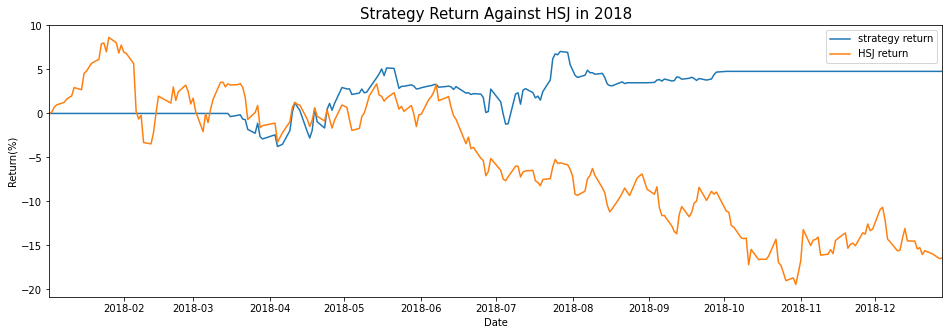

In [44]:
fig = plt.subplots(figsize=(16, 5))

plt.title('Strategy Return Against HSJ in 2018', fontsize=15)

plt.xlabel('Date', fontsize=10)
plt.ylabel('Return(%)', fontsize=10)

plt.plot(result.index, result['strategy_return'], label="strategy return")
plt.plot(result.index, result['HSI_return'], label="HSJ return")
plt.legend()

plt.xlim(result.index.min(), result.index.max())
ticks = ['2018-01-02', '2018-02-01', '2018-03-01', '2018-04-01', '2018-05-01', '2018-06-01', '2018-07-01', '2018-08-01', '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01']

In [ ]:
a = {"ticket": "0123.HK", "buy_date": "1-1-16", "sell_date": "4-1-16", "long": True}
b = {"ticket": "0124.HK", "buy_date": "1-1-16", "sell_date": "4-1-16", "long": True}
c = {"ticket": "0153.HK", "buy_date": "1-1-16", "sell_date": "4-1-16", "long": True}
d = {"ticket": "0183.HK", "buy_date": "1-1-16", "sell_date": "4-1-16", "long": True}

lst = [a,b,c,d]
rm = [a,d]

for i in lst:
    lst = [e for e in lst if e not in rm]

lst

[{'ticket': '0124.HK',
  'buy_date': '1-1-16',
  'sell_date': '4-1-16',
  'long': True},
 {'ticket': '0153.HK',
  'buy_date': '1-1-16',
  'sell_date': '4-1-16',
  'long': True}]

In [ ]:
def get_stock_price():
    start = datetime.datetime(2018, 1, 1).date()
    end = datetime.datetime(2018, 12, 31).date()
    # end = start + datetime.timedelta(days=35)
    # print(end)
    stock_data = yf.download("^HSI", start, end)
    # print(stock_data)
    return stock_data

get_stock_price()



[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-02,30028.289062,30515.310547,30028.289062,30515.310547,30515.310547,2442333400
2018-01-03,30658.730469,30724.320312,30456.759766,30560.949219,30560.949219,2309467700
2018-01-04,30691.710938,30796.929688,30560.429688,30736.480469,30736.480469,2995571100
2018-01-05,30893.859375,30911.009766,30638.529297,30814.640625,30814.640625,2263930100
2018-01-08,30895.089844,30929.150391,30732.539062,30899.529297,30899.529297,2004162500
...,...,...,...,...,...,...
2018-12-20,25723.529297,25859.820312,25416.880859,25623.529297,25623.529297,1717860300
2018-12-21,25512.300781,25805.609375,25313.750000,25753.419922,25753.419922,1935298900
2018-12-24,25515.400391,25651.380859,25421.429688,25651.380859,25651.380859,1074120100


In [ ]:
print(stock_data.index[0].date())
print(stock_data.iloc[0]['Close'])

NameError: name 'stock_data' is not defined